<a href="https://colab.research.google.com/github/punkmic/Topic-Modeling-Reclame-Aqui/blob/master/Topic_Modeling_Reclame_Aqui_With_LSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
import pandas as pd # for data manipulation
import os # for interacting with the operating system
from sklearn.cluster import KMeans
import matplotlib.ticker as ticker
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pickle
import numpy as np
import itertools
from matplotlib.lines import Line2D
import seaborn as sns
import csv
import ast # for convert str to tuple
try:
  from wordcloud import WordCloud
  import optuna # for hyperparameter optimization
  import pyLDAvis
  import pyLDAvis.gensim_models as gs
  from gensim.utils import simple_tokenize
  from gensim.models import LsiModel
  from gensim.utils import simple_preprocess
  from gensim import models
  from gensim.corpora import Dictionary
  from gensim.models.coherencemodel import CoherenceModel
  from gensim.models.phrases import Phrases, Phraser
except:
  !pip install gensim
  !pip install pyldavis
  !pip install optuna
  !pip install wordcloud
  from gensim import models
  from gensim.corpora import Dictionary
  from gensim.models.coherencemodel import CoherenceModel
  from gensim.models import LsiModel
  import pyLDAvis.gensim_models as gs
  from gensim.utils import simple_preprocess
  from gensim.models.phrases import Phrases, Phraser
  import optuna # for hyperparameter optimization
  
# import custom module
%cd /content/Topic-Modeling-Reclame-Aqui/utils
from max_limit import max_limit
%cd ../

#### **Github**

In [ ]:
! ssh-keygen -t rsa -b 4096
# Add github.com to our known hosts
! ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts
# Restrict the key permissions, or else SSH will complain.
! chmod go-rwx /root/.ssh/id_rsa

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
Created directory '/root/.ssh'.
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa
Your public key has been saved in /root/.ssh/id_rsa.pub
The key fingerprint is:
SHA256:fG43qgCCbVBlJEvn/pWl9SYw3AgTldgawPG1TkPBxUM root@e6f830f6d5c0
The key's randomart image is:
+---[RSA 4096]----+
|  ++Bo+*=*E      |
| o *..o*++o      |
|. . . .oO +.     |
| + .  .+ O .     |
|. + o   S o o    |
| . . o . o o     |
|      o   o o    |
|       . . o .   |
|        ...      |
+----[SHA256]-----+
# github.com:22 SSH-2.0-babeld-9c9abdde


In [ ]:
! cat /root/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQC+FxSEZGTMk+XCaY1Q0QMzp5OruOUlPGhR6aGrlaoZKSD1OijEectmFFiv+V/MjiPAf+qfUOmdmEAsiWQTYSS84/z6xhxHyZvv+qMWUmUBclXbsnSnUxOAWh/n6fQyQ47OmG+wnF4EWeOaB3pEx7mcswsXHiwBKppjQsjVC5RTMZnTzU+IdDZHulWrUs99RWOCThjiBbXdtHYeyVs40AJy+JRXUr+jCJLVgrNbs9MhSDXGB8ByxlGU/Vmsv2LI5TAvnSGeWiGrpfSvJHQE+n/RBNkeMj4F4EPW8ru3H3pWvPDmunnlJ7cmd8eGgQ8Wc686BKO4+3NqwTXokXlznVKxHCH8fziOe/3SbsryJVB69e5pzUWhTaH8WSXE6zAIZBAiuiUddePq4d7NUoIMxGOkw6INUR5zCKSeVvGmIzRIA5aS7qhfPSxMX1iqEYjEYziVm9+XTU9NCRDD4VoxSL03K2wTAANwhChVZ7nMgvv6MD3lJDgvfRzWOCtOh+KZTyvdiZuAcuQEmQxqnvCcd2SSXadhRrBq2lmk/U/fPYxvkdPT0LxyW3Snk56VwcQdjYmp8/pIxCKLf4gpDbfE8j5oZSAuRauS5+XPXJKYD5+z0CZon08oslCiGqf+fL+DZAQS696+2nAIdiC70rJOuG8z3Z1JcSGaVjoE1hk5W8dV5w== root@e6f830f6d5c0


In [ ]:
!git config --global user.email ""
!git config --global user.name ""

In [ ]:
!ssh -T git@github.com

Hi punkmic! You've successfully authenticated, but GitHub does not provide shell access.


In [ ]:
!git clone git@github.com:punkmic/Topic-Modeling-Reclame-Aqui.git

Cloning into 'Topic-Modeling-Reclame-Aqui'...
remote: Enumerating objects: 19423, done.
remote: Counting objects: 100% (318/318), done.
remote: Compressing objects: 100% (263/263), done.
remote: Total 19423 (delta 169), reused 192 (delta 54), pack-reused 19105
Receiving objects: 100% (19423/19423), 271.41 MiB | 19.86 MiB/s, done.
Resolving deltas: 100% (3545/3545), done.
Updating files: 100% (1149/1149), done.


In [ ]:
#%cd /content/Topic-Modeling-Reclame-Aqui/

#### **Load dataset**

In [ ]:
WORK_DIR = '/content/Topic-Modeling-Reclame-Aqui'
DATASETS_DIR = '/content/Topic-Modeling-Reclame-Aqui/datasets'

In [ ]:
df = pd.read_csv(os.path.join(DATASETS_DIR, 'processed_v1.csv'))

In [ ]:
df.head(3)

,title,documents,documents_nouns,bigrams,noun_bigrams,trigrams,noun_trigrams,freq_words_removed,freq_words_removed_nouns
0,pedir cancelado justificativa semana compro,pesquisando bastante novo comprar resolver agu...,semana desconto promoção desconto compra custo...,"[('pesquisando', 'bastante'), ('bastante', 'no...","[('semana', 'desconto'), ('desconto', 'promoçã...","[('pesquisando', 'bastante', 'novo'), ('bastan...","[('semana', 'desconto', 'promoção'), ('descont...",pesquisando bastante novo resolver aguardar se...,semana desconto promoção desconto plataforma c...
1,pedir cancelar,sinceramente decepcionar entrar contato procon...,procon audiência conciliação solicitação produ...,"[('sinceramente', 'decepcionar'), ('decepciona...","[('procon', 'audiência'), ('audiência', 'conci...","[('sinceramente', 'decepcionar', 'entrar'), ('...","[('procon', 'audiência', 'conciliação'), ('aud...",sinceramente decepcionar procon hoje informar ...,procon audiência conciliação solicitação estoq...
2,cobrança indever,cancelei plano antes terminar período testir g...,cancelei período plataforma fatura gratuito ca...,"[('cancelei', 'plano'), ('plano', 'antes'), ('...","[('cancelei', 'período'), ('período', 'platafo...","[('cancelei', 'plano', 'antes'), ('plano', 'an...","[('cancelei', 'período', 'plataforma'), ('perí...",cancelei plano antes terminar período testir g...,cancelei período plataforma fatura gratuito ca...


In [ ]:
COLNAME = 'freq_words_removed_nouns'
# remove any na value
df.dropna(subset=[COLNAME], inplace=True)
documents = df[COLNAME]
print(len(documents))
print(documents[:1])

10292
0    semana desconto promoção desconto plataforma c...
Name: freq_words_removed_nouns, dtype: object


In [ ]:
LSI_RESULTS_DIR = os.path.join('/content/Topic-Modeling-Reclame-Aqui/lsi/', COLNAME)

if not os.path.exists(LSI_RESULTS_DIR):
  os.makedirs(LSI_RESULTS_DIR)

In [ ]:
NUMBER_OF_TOPICS = 26

In [ ]:
optimum_topics = []
def plot_coherence(coherence_scores, n_topics, prefix):
  # create the plot
  plt.figure(figsize=[10, 8])

  # create a line plot
  ax = sns.lineplot(x=list(coherence_scores.keys()), y=list(coherence_scores.values()), color='#238C8C')

  # add labels to the axes
  plt.xlabel('Número de Tópicos')
  plt.ylabel('Coerência (score)')
  plt.title("Coerência por número de tópicos", fontsize=16)
  
  # set x-axis limits
  plt.xlim(2, n_topics)

  # customize x-ticks
  plt.xticks(range(2, n_topics, 2))

  # Add a vertical line to show the optimum number of topics
  position = list(coherence_scores.keys())[np.argmax(list(coherence_scores.values()))]
  optimum_topics.append(position)
  plt.axvline(position,  color='#F26457', linestyle='--')  

  # Draw a custom legend
  legend_elements = [Line2D([0], [0], color='#238C8C', 
                          ls='-', label='Valor de coerência (c_v)'),
                   Line2D([0], [1], color='#F26457', 
                          ls='--', label='Número de tópicos ótimo')]

  ax.legend(handles=legend_elements, loc='upper right')

  # save plot
  plt.savefig(os.path.join(LSI_RESULTS_DIR, f'{prefix}_coherence_by_topics.png'))

  # show the plot
  plt.show()

#### **Unigram**

In [ ]:
# Tokenize documents
texts = [
    [word for word in document.lower().split()]
    for document in documents
]

# Create a dictionary from the tokens
dictionary = Dictionary(texts)

# Create a corpus from the tokens
corpus = [dictionary.doc2bow(text) for text in texts]

# Create a dict to store the coherence scores
coherence_scores = {}

for t in range(2, NUMBER_OF_TOPICS):
    lsi_model = LsiModel(corpus, id2word=dictionary, num_topics=t, random_seed=42)
    # corpus_lsi = lsi_model[corpus]

    cm = CoherenceModel(model=lsi_model, texts=texts, coherence='c_v')
    score = cm.get_coherence()
    tup = t, score
    coherence_scores[t] = score

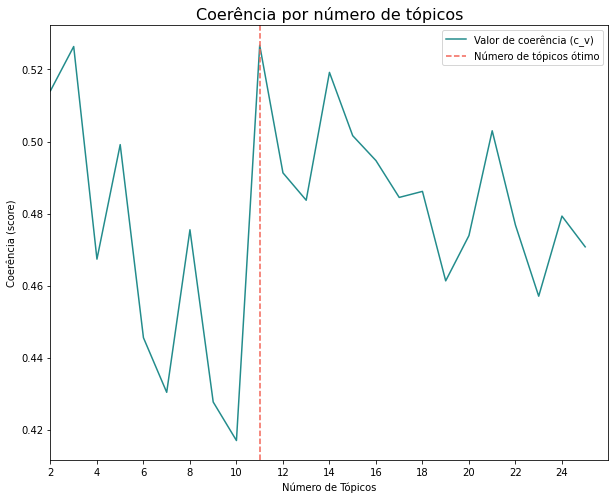

In [ ]:
plot_coherence(coherence_scores, NUMBER_OF_TOPICS, 'unigrams')

#### **Bigrams**

In [ ]:
# Tokenize documents
texts = [
    [word for word in document.lower().split()]
    for document in documents
]

# create bigrams
bigram = Phrases(texts, min_count=1)
bigram_phraser = Phraser(bigram)
texts = [bigram_phraser[doc] for doc in texts]

# Create a dictionary from the tokens
dictionary = Dictionary(texts)

# Create a corpus from the tokens
corpus = [dictionary.doc2bow(text) for text in texts]

# Create a dict to store the coherence scores
coherence_scores = {}

for t in range(2, NUMBER_OF_TOPICS):
    lsi_model = LsiModel(corpus, id2word=dictionary, num_topics=t, random_seed=42)
    # corpus_lsi = lsi_model[corpus]

    cm = CoherenceModel(model=lsi_model, texts=texts, coherence='c_v')
    score = cm.get_coherence()
    tup = t, score
    coherence_scores[t] = score

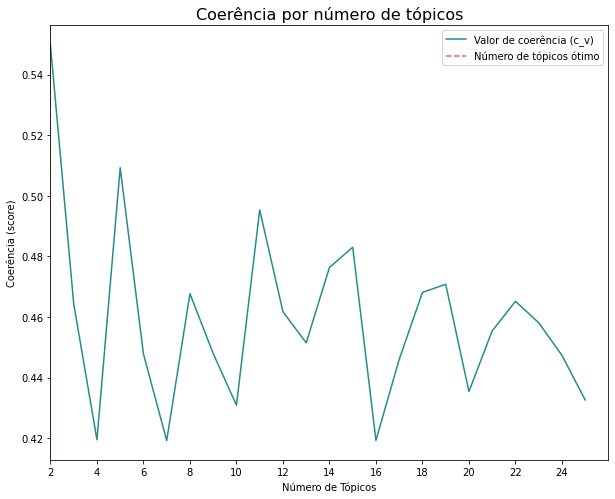

In [ ]:
plot_coherence(coherence_scores, NUMBER_OF_TOPICS, 'bigrams')

#### **Trigrams**

In [ ]:
# Tokenize documents
texts = [
    [word for word in document.lower().split()]
    for document in documents
]

# Create trigrams
trigram = Phrases(texts, min_count=1)
trigram_phraser = Phraser(trigram)
texts = [trigram_phraser[bigram_phraser[token]] for token in texts]

# Create a dictionary from the tokens
dictionary = Dictionary(texts)

# Create a corpus from the tokens
corpus = [dictionary.doc2bow(text) for text in texts]

# Create a dict to store the coherence scores
coherence_scores = {}

for t in range(2, NUMBER_OF_TOPICS):
    lsi_model = LsiModel(corpus, id2word=dictionary, num_topics=t, random_seed=42)
    # corpus_lsi = lsi_model[corpus]

    cm = CoherenceModel(model=lsi_model, texts=texts, coherence='c_v')
    score = cm.get_coherence()
    tup = t, score
    coherence_scores[t] = score

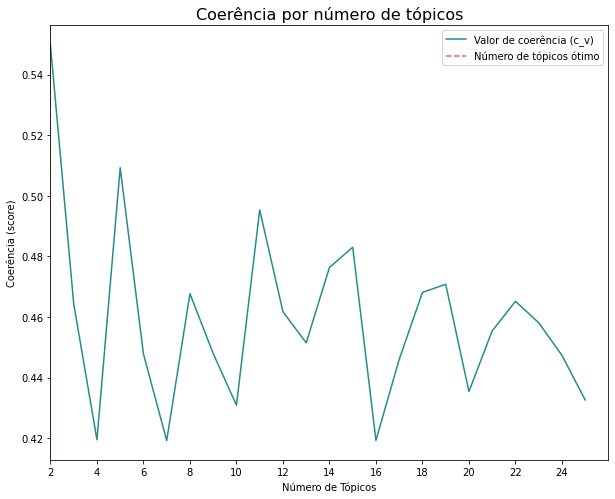

In [ ]:
plot_coherence(coherence_scores, NUMBER_OF_TOPICS, 'trigrams')

#### **Hyperparameter tuning**

In [ ]:
# set the minimum and maximum number of topics based on coherence score plots
MIN_TOPICS = min(optimum_topics)
MAX_TOPICS = max(optimum_topics)
def optimizer(trial):

  ngram_range = ast.literal_eval(trial.suggest_categorical('ngram_range', ['(1,1)', '(1,2)', '(1,3)']))
  nr_topics = trial.suggest_int('lsi__nr_topics', MIN_TOPICS, MAX_TOPICS)
  min_count = trial.suggest_int('bigram__min_count', 2, 20)
  filter = trial.suggest_float('dictionary__filter_extremes', 0.70, 0.95)

  texts = [
      [word for word in document.lower().split()]
      for document in documents
  ]

  if ngram_range == (1,2):
    # Create bigrams
    bigram = Phrases(texts, min_count=min_count)
    bigram_phraser = Phraser(bigram)
    texts = [bigram_phraser[token] for token in texts] 
  elif ngram_range == (1,3):
    # Create bigrams
    bigram = Phrases(texts, min_count=min_count)
    bigram_phraser = Phraser(bigram)
    texts = [bigram_phraser[token] for token in texts] 
    
    # Create trigrams
    trigram = Phrases(texts, min_count=min_count)
    trigram_phraser = Phraser(trigram)
    texts = [trigram_phraser[bigram_phraser[token]] for token in texts]
  
  
  # create a corpus from a list of texts
  dictionary = Dictionary(texts)

  # Filter out words that occur more than X% of the documents.
  dictionary.filter_extremes(no_above=filter)

  # convert documents to bag of words
  corpus = [dictionary.doc2bow(text) for text in texts]

  # create a new LSI model
  lsi_model = LsiModel(corpus=corpus,
                           id2word=dictionary,
                           num_topics=nr_topics,
                           random_seed=100)
  
  # compute coherence score
  score = CoherenceModel(lsi_model, texts=texts, corpus=corpus, dictionary=dictionary).get_coherence()

  new_file = False
  # write header if document does not exists
  if not os.path.exists(os.path.join(LSI_RESULTS_DIR, f'coherence_scores.csv')):
       new_file = True

   # save scores
  if not os.path.exists(LSI_RESULTS_DIR):
     os.makedirs(LSI_RESULTS_DIR)

  with open(path, 'a', newline='') as f:
     fieldnames = ['topic', 'ngram_range', 'min_count', 'filter', 'score']
     writer = csv.DictWriter(f, fieldnames=fieldnames)
     data = [{'topic': nr_topics, 
              'ngram_range': ngram_range,
              'min_count': min_count,
              'filter':filter,
              'score': score}]
     if new_file:
       writer.writeheader()
    
     # write rows
     writer.writerows(data)
  return  score

In [ ]:
%%time
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# delete csv if it exists
path = os.path.join(LSI_RESULTS_DIR, f'coherence_scores.csv')
if os.path.exists(path):
  os.remove(path)

NUMBER_OF_MODELS = 20

# create a new study
study = optuna.create_study(study_name=f'LSI_{COLNAME}', direction='maximize')

# run the optmize function 
study.optimize(optimizer, n_trials=NUMBER_OF_MODELS, show_progress_bar=True)

# best
print('Best value %s', study.best_value)
print('Best params: %s', study.best_params)

/usr/local/lib/python3.8/dist-packages/optuna/progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2023-02-02 21:21:34,756] Trial 0 finished with value: 0.49385079404982174 and parameters: {'ngram_range': '(1,3)', 'lsi__nr_topics': 12, 'bigram__min_count': 3, 'dictionary__filter_extremes': 0.8906485946655494}. Best is trial 0 with value: 0.49385079404982174.
[I 2023-02-02 21:21:36,801] Trial 1 finished with value: 0.49218226583736085 and parameters: {'ngram_range': '(1,2)', 'lsi__nr_topics': 12, 'bigram__min_count': 3, 'dictionary__filter_extremes': 0.866483220065221}. Best is trial 0 with value: 0.49385079404982174.
[I 2023-02-02 21:21:38,805] Trial 2 finished with value: 0.5299645603948179 and parameters: {'ngram_range': '(1,2)', 'lsi__nr_topics': 9, 'bigram__min_count': 15, 'dictionary__filter_extremes': 0.7835438902050522}. Best is trial 2 with value: 0.5299645603948179.
[I 2023-02-02 21:21:40,905] Trial 3 finished with value: 0.44704165991020944 and parameters: {'ngram_range': '(1,3)', 'lsi__nr_topics': 3, 'bigram__min_count': 11, 'dictionary__filter_extremes': 0.91788993451

In [ ]:
def get_topics(lsi, nr_topics):
  x=lsi.show_topics(num_topics=nr_topics, num_words=10, formatted=False)
  topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]
  topics = []
  words = []
  for t, w in topics_words:
    topics.append(t)
    words.append(w)
  return pd.DataFrame({'Tópicos': topics, 'Words': words})

In [ ]:
def get_words_by_topic_id(lsi, topic_id, topn=20):
  return [dictionary[word_id] for word_id, prob in lsi.get_topic_terms(topic_id, topn=topn)]

In [ ]:
def get_words_n_score_by_topic_id(lsi, topics, topn=10):
  ls = []
  for id in topics:
    ls.append([(dictionary[word_id], prob) for word_id, prob in lsi.get_topic_terms(id, topn=topn)])
  return ls

#### **Topics of the optimized model**

In [ ]:
filename = os.path.join(LSI_RESULTS_DIR, f'coherence_scores.csv')
df_opt = pd.read_csv(filename)

# init variables
max_value = df_opt['score'].max()
row = df_opt.loc[df_opt['score'] == max_value]
NUMBER_OF_TOPICS = row['topic'].astype(int).values[0]
min_count = row['min_count'].astype(int).values[0]
ngram_range = row['ngram_range'].values[0]

# tokenize the text data
texts = [
      [word for word in document.lower().split()]
      for document in documents
]

if ngram_range == (1,2):
    # Create bigrams
    bigram = Phrases(texts, min_count=min_count)
    bigram_phraser = Phraser(bigram)
    texts = [bigram_phraser[token] for token in texts] 
elif ngram_range == (1,3):
    # Create bigrams
    bigram = Phrases(texts, min_count=min_count)
    bigram_phraser = Phraser(bigram)
    texts = [bigram_phraser[token] for token in texts] 
    
    # Create trigrams
    trigram = Phrases(texts, min_count=min_count)
    trigram_phraser = Phraser(trigram)
    texts = [trigram_phraser[bigram_phraser[token]] for token in texts]
    
# create a corpus from a list of texts
dictionary = Dictionary(texts)

# Filter out words that occur more than X% of the documents.
dictionary.filter_extremes(no_above=0.60)

# convert documents to bag of words
corpus = [dictionary.doc2bow(text) for text in texts]

# create a new LSI model
lsi_model = LsiModel(corpus=corpus,
                           id2word=dictionary,
                           num_topics=NUMBER_OF_TOPICS,
                           random_seed=100)

# save topics terms
topics_terms = get_topics(lsi_model, NUMBER_OF_TOPICS)
topics_terms.to_csv(os.path.join(LSI_RESULTS_DIR, 'topics_terms_optimized_model.csv'), index=False)
topics_terms.head(NUMBER_OF_TOPICS)

,Tópicos,Words
0,0,"[loja, valor, dia, empresa, problema, prazo, c..."
1,1,"[valor, loja, cartão, dia, prazo, empresa, pag..."
2,2,"[loja, dia, valor, prazo, empresa, cartão, pro..."
3,3,"[empresa, dia, valor, problema, prazo, atendim..."
4,4,"[cartão, valor, empresa, pagamento, fatura, di..."


In [ ]:
print(CoherenceModel(lsi_model, texts=texts, corpus=corpus, dictionary=dictionary).get_coherence())

0.5634038215934013


**Update github**

In [ ]:
%cd /content/Topic-Modeling-Reclame-Aqui/
!git status

In [ ]:
!git add lsi/

In [ ]:
!git commit -m "Add lsi results"

In [ ]:
!git push origin master

!rm -rf /root/.ssh/